In [87]:
import pandas as pd

In [88]:
df_votants = pd.read_csv('database_deputes.csv', index_col=0)
df_votes = pd.read_csv('database_votes2.csv', index_col=0)

**Feature 1 : indice_accord**

In [90]:
indice_accord = pd.read_csv('indice_accord.csv', index_col=0)
indice_accord = indice_accord[['idVotant', 'IndiceAccord']]
indice_accord = indice_accord.rename(columns={'IndiceAccord' : 'indice_accord'})
indice_accord

,idVotant,indice_accord
0,PA719952,74.000000
1,PA607395,71.171171
2,PA718710,76.120959
3,PA718802,74.705882
4,PA719032,74.860957
...,...,...
570,PA720802,36.000000
571,PA643004,27.272727
572,PA719002,14.285714
573,PA774958,14.583333


In [91]:
df_clustering = df_votants[['idVotant', 'Région']]
df_cluster = df_clustering.merge(indice_accord, on='idVotant', how='left')
df_cluster = df_cluster.groupby(['idVotant', 'Région', 'indice_accord']).count().reset_index()
df_cluster

,idVotant,Région,indice_accord
0,PA1008,Nouvelle-Aquitaine,31.937984
1,PA1012,Auvergne-Rhône-Alpes,37.425150
2,PA1029,Provence-Alpes-Côte d'Azur,43.636364
3,PA1198,Normandie,32.047478
4,PA1206,Ile-de-France,28.409091
...,...,...,...
570,PA774962,Réunion,40.000000
571,PA856,Grand Est,38.770053
572,PA923,Grand Est,40.259740
573,PA942,Grand Est,51.327434


**Feature 2 : proportion_vote**

In [92]:
proportion_vote = pd.read_csv('proportion_vote.csv', index_col=0)
proportion_vote

,idVotant,Contre,Pour
0,PA1008,31.162791,68.837209
1,PA1012,34.131737,65.868263
2,PA1029,51.818182,48.181818
3,PA1198,33.234421,66.765579
4,PA1206,45.454545,54.545455
...,...,...,...
570,PA774962,80.000000,20.000000
571,PA856,42.780749,57.219251
572,PA923,41.991342,58.008658
573,PA942,49.778761,50.221239


In [93]:
df_cluster = df_cluster.merge(proportion_vote, on='idVotant', how='left')
df_cluster

,idVotant,Région,indice_accord,Contre,Pour
0,PA1008,Nouvelle-Aquitaine,31.937984,31.162791,68.837209
1,PA1012,Auvergne-Rhône-Alpes,37.425150,34.131737,65.868263
2,PA1029,Provence-Alpes-Côte d'Azur,43.636364,51.818182,48.181818
3,PA1198,Normandie,32.047478,33.234421,66.765579
4,PA1206,Ile-de-France,28.409091,45.454545,54.545455
...,...,...,...,...,...
570,PA774962,Réunion,40.000000,80.000000,20.000000
571,PA856,Grand Est,38.770053,42.780749,57.219251
572,PA923,Grand Est,40.259740,41.991342,58.008658
573,PA942,Grand Est,51.327434,49.778761,50.221239


In [94]:
#region = pd.read_excel('region.xls')
#region

In [95]:
#region = region[['Population par région', 'Unnamed: 5']]
#region = region.rename(columns={'Unnamed: 5' : 'densite_population_region', 'Population par région' : 'Région'})
#region = region.iloc[3:22]
#region

In [96]:
#df_cluster = df_cluster.merge(region, on='Région', how='left')
#df_cluster

In [97]:
df_cluster = df_cluster.drop(columns='Région')

In [98]:
df_cluster

,idVotant,indice_accord,Contre,Pour
0,PA1008,31.937984,31.162791,68.837209
1,PA1012,37.425150,34.131737,65.868263
2,PA1029,43.636364,51.818182,48.181818
3,PA1198,32.047478,33.234421,66.765579
4,PA1206,28.409091,45.454545,54.545455
...,...,...,...,...
570,PA774962,40.000000,80.000000,20.000000
571,PA856,38.770053,42.780749,57.219251
572,PA923,40.259740,41.991342,58.008658
573,PA942,51.327434,49.778761,50.221239


**Feature 3 : taux_participation**

In [99]:
oui = df_votes.groupby('idVotant').count()
oui['taux_participation'] = oui['idScrutin']/3117*100
oui = oui[['taux_participation']]
oui

,taux_participation
idVotant,
PA1008,20.692974
PA1012,10.715432
PA1029,3.529034
PA1198,10.811678
PA1206,5.646455
...,...
PA774962,0.160411
PA856,11.998717
PA923,7.410972


In [100]:
df_cluster = df_cluster.merge(oui, on='idVotant', how='left')
df_cluster

,idVotant,indice_accord,Contre,Pour,taux_participation
0,PA1008,31.937984,31.162791,68.837209,20.692974
1,PA1012,37.425150,34.131737,65.868263,10.715432
2,PA1029,43.636364,51.818182,48.181818,3.529034
3,PA1198,32.047478,33.234421,66.765579,10.811678
4,PA1206,28.409091,45.454545,54.545455,5.646455
...,...,...,...,...,...
570,PA774962,40.000000,80.000000,20.000000,0.160411
571,PA856,38.770053,42.780749,57.219251,11.998717
572,PA923,40.259740,41.991342,58.008658,7.410972
573,PA942,51.327434,49.778761,50.221239,14.501123


In [101]:
df_cluster = df_cluster.set_index('idVotant')
df_cluster

,indice_accord,Contre,Pour,taux_participation
idVotant,,,,
PA1008,31.937984,31.162791,68.837209,20.692974
PA1012,37.425150,34.131737,65.868263,10.715432
PA1029,43.636364,51.818182,48.181818,3.529034
PA1198,32.047478,33.234421,66.765579,10.811678
PA1206,28.409091,45.454545,54.545455,5.646455
...,...,...,...,...
PA774962,40.000000,80.000000,20.000000,0.160411
PA856,38.770053,42.780749,57.219251,11.998717
PA923,40.259740,41.991342,58.008658,7.410972


**Features ++ : historiques des votes**

In [102]:
copy = df_votes.copy()
copy = copy.pivot(index = 'idVotant', columns = 'idScrutin', values = 'vote')
copy

idScrutin,0,1,2,3,4,5,6,7,8,9,...,3107,3108,3109,3110,3111,3112,3113,3114,3115,3116
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Pour,NaN,NaN,NaN,Pour
PA1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour,NaN,NaN
PA1029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PA1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour,NaN,...,NaN,NaN,NaN,NaN,NaN,Pour,NaN,NaN,NaN,NaN
PA1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PA856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PA923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
#copy = copy.dropna(thresh = 285) 
#un peu à l'arrache, il faudrait faire ça de manière plus jolie pcq là on sort une liste sans index 
#et on la rebalance dans le DF
#a priori pas de souci pcq le DF copy est trié mais bon c'est pas très clean
maj = []
for scrutin in range(3117):
    votemaj = pd.DataFrame(copy[scrutin].value_counts())[scrutin].idxmax()
    maj.append(votemaj)

copy.loc['vote_majoritaire'] = maj
copy = copy.fillna(copy.loc['vote_majoritaire'])
copy

idScrutin,0,1,2,3,4,5,6,7,8,9,...,3107,3108,3109,3110,3111,3112,3113,3114,3115,3116
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Contre,Contre,...,Contre,Contre,Contre,Pour,Contre,Pour,Pour,Contre,Contre,Pour
PA1012,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Contre,Contre,...,Contre,Contre,Contre,Pour,Contre,Contre,Pour,Pour,Contre,Contre
PA1029,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Contre,Contre,...,Contre,Contre,Contre,Pour,Contre,Contre,Pour,Contre,Contre,Contre
PA1198,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Pour,Contre,...,Contre,Contre,Contre,Pour,Contre,Pour,Pour,Contre,Contre,Contre
PA1206,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Contre,Contre,...,Contre,Contre,Contre,Pour,Contre,Contre,Pour,Contre,Contre,Contre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA856,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Contre,Contre,...,Contre,Contre,Contre,Pour,Contre,Contre,Pour,Contre,Contre,Contre
PA923,Pour,Contre,Contre,Contre,Contre,Pour,Contre,Pour,Contre,Pour,...,Contre,Contre,Contre,Pour,Contre,Contre,Pour,Contre,Contre,Contre
PA942,Pour,Contre,Pour,Contre,Contre,Pour,Contre,Pour,Contre,Contre,...,Contre,Pour,Contre,Pour,Contre,Contre,Pour,Contre,Contre,Contre


In [104]:
resultats = pd.get_dummies(copy, drop_first=True)
resultats = resultats.drop('vote_majoritaire', axis=0)
resultats

,0_Pour,1_Pour,2_Pour,3_Non-votant,3_Pour,4_Pour,5_Non-votant,5_Pour,6_Pour,7_Pour,...,3111_Non-votant,3111_Pour,3112_Pour,3113_Non-votant,3113_Pour,3114_Non-votant,3114_Pour,3115_Pour,3116_Non-votant,3116_Pour
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
PA1012,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
PA1029,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
PA1198,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
PA1206,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
PA856,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
PA923,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [106]:
df_cluster = df_cluster.merge(resultats, left_index=True, right_index=True)
df_cluster

,indice_accord,Contre,Pour,taux_participation,0_Pour_x,1_Pour_x,2_Pour_x,3_Non-votant_x,3_Pour_x,4_Pour_x,...,3111_Non-votant_y,3111_Pour_y,3112_Pour_y,3113_Non-votant_y,3113_Pour_y,3114_Non-votant_y,3114_Pour_y,3115_Pour_y,3116_Non-votant_y,3116_Pour_y
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,31.937984,31.162791,68.837209,20.692974,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
PA1012,37.425150,34.131737,65.868263,10.715432,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
PA1029,43.636364,51.818182,48.181818,3.529034,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
PA1198,32.047478,33.234421,66.765579,10.811678,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
PA1206,28.409091,45.454545,54.545455,5.646455,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,40.000000,80.000000,20.000000,0.160411,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
PA856,38.770053,42.780749,57.219251,11.998717,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
PA923,40.259740,41.991342,58.008658,7.410972,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Les features 1 à 3 sont issues des statistiques descriptives sur la participation de chaque votant, son accord moyen par rapport au résultat final du scrutin et son pourcentage de vote pour et de vote contre. Ces statistiques sont intéressantes commes features car elles permettent de récupérer l'information perdue quand on crée la base pour le clustering. En effet, on perd le résultat final du scrutin. De plus, on perd l'abstention dans la mesure où des NaN sont créées pour les scrutins pour lesquels les députés se sont abstenus. Pour réaliser le clustering nous avons du remplacer ces NaN par le vote majoritaire sur le scrutin considéré. Le taux de participation ainsi que le pourcentage de vote pour et le pourcentage de vote contre de chaque député permettent de récupérer l'information perdue dans ce remplacement des NaN. 

**Clustering - préliminaires**

In [30]:
#Test pour savoir quel nombre de clusters est le plus optimal 
from sklearn.cluster import KMeans
from sklearn import metrics

NB_CLUSTERS = 10 #nombre maximal de clusters qu'on veut tester

for k in range(2, NB_CLUSTERS + 1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_cluster) #kmeans avec k clusters    
    #puis on détermine le coefficient de silhouette associé, qui mesure la pertinence du clustering :
    coef_sil = metrics.silhouette_score(df_cluster, kmeans.labels_, metric='euclidean') 
    print("Nombre de clusters: {}".format(k))
    print('Coefficient de silhouette: {:.3g}'.format(coef_sil))
    print("-" * 100)

Nombre de clusters: 2
Coefficient de silhouette: 0.577
----------------------------------------------------------------------------------------------------
Nombre de clusters: 3
Coefficient de silhouette: 0.397
----------------------------------------------------------------------------------------------------
Nombre de clusters: 4
Coefficient de silhouette: 0.299
----------------------------------------------------------------------------------------------------
Nombre de clusters: 5
Coefficient de silhouette: 0.255
----------------------------------------------------------------------------------------------------
Nombre de clusters: 6
Coefficient de silhouette: 0.242
----------------------------------------------------------------------------------------------------
Nombre de clusters: 7
Coefficient de silhouette: 0.243
----------------------------------------------------------------------------------------------------
Nombre de clusters: 8
Coefficient de silhouette: 0.258
---------

In [128]:
#On récupère le groupe politique pour chaque député
groupe = df_votes[['idVotant', 'Groupe politique (complet)']].drop_duplicates()
groupe = groupe.set_index('idVotant')
groupe

,Groupe politique (complet)
idVotant,
PA606171,La République en Marche
PA721824,La République en Marche
PA719952,La République en Marche
PA607395,La République en Marche
PA718710,La République en Marche
...,...
PA643192,Socialistes et apparentés
PA721768,La République en Marche
PA774962,Gauche démocrate et républicaine


**Clustering à 2 clusters**

Dans un premier temps on réalise un clustering à 2 clusters, qui semble le plus pertinent d'après les coefficients de silhouettes obtenus précédemment. 

In [116]:
df_cluster2 = df_cluster

N_CLUSTERS = 2
clustering = KMeans(n_clusters=N_CLUSTERS)
clustering.fit(df_cluster2)

#on détermine ensuite dans quel cluster chaque individu de df_cluster sera affecté :
pred = clustering.predict(df_cluster2)

df_cluster2['cluster'] = pred #on ajoute une colonne au df, qui indique le numéro du cluster auquel appartient chaque individu

In [117]:
df_clusterised2 = df_cluster2
df_clusterised2

,indice_accord,Contre,Pour,taux_participation,0_Pour_x,1_Pour_x,2_Pour_x,3_Non-votant_x,3_Pour_x,4_Pour_x,...,3111_Pour_y,3112_Pour_y,3113_Non-votant_y,3113_Pour_y,3114_Non-votant_y,3114_Pour_y,3115_Pour_y,3116_Non-votant_y,3116_Pour_y,cluster
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,31.937984,31.162791,68.837209,20.692974,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
PA1012,37.425150,34.131737,65.868263,10.715432,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
PA1029,43.636364,51.818182,48.181818,3.529034,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
PA1198,32.047478,33.234421,66.765579,10.811678,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
PA1206,28.409091,45.454545,54.545455,5.646455,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,40.000000,80.000000,20.000000,0.160411,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
PA856,38.770053,42.780749,57.219251,11.998717,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
PA923,40.259740,41.991342,58.008658,7.410972,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [118]:
df_final2 = df_clusterised2.merge(groupe, left_index=True, right_index=True)
df_final2

,indice_accord,Contre,Pour,taux_participation,0_Pour_x,1_Pour_x,2_Pour_x,3_Non-votant_x,3_Pour_x,4_Pour_x,...,3112_Pour_y,3113_Non-votant_y,3113_Pour_y,3114_Non-votant_y,3114_Pour_y,3115_Pour_y,3116_Non-votant_y,3116_Pour_y,cluster,Groupe politique (complet)
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,31.937984,31.162791,68.837209,20.692974,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,Socialistes et apparentés
PA1012,37.425150,34.131737,65.868263,10.715432,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,Les Républicains
PA1029,43.636364,51.818182,48.181818,3.529034,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Les Républicains
PA1198,32.047478,33.234421,66.765579,10.811678,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,Socialistes et apparentés
PA1206,28.409091,45.454545,54.545455,5.646455,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Non inscrit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,40.000000,80.000000,20.000000,0.160411,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Gauche démocrate et républicaine
PA856,38.770053,42.780749,57.219251,11.998717,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Les Républicains
PA923,40.259740,41.991342,58.008658,7.410972,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Les Républicains


In [119]:
# On crée un dataframe par cluster, afin de regarder la distribution de la variable d'intérêt dans chaque cluster
list_cluster2 = []
for i in range (N_CLUSTERS):
     list_cluster2.append(df_final2[df_final2['cluster'] == i])

[Text(0, 0, 'La République en Marche'),
 Text(1, 0, 'Agir ensemble'),
 Text(2, 0, 'Les Républicains'),
 Text(3, 0, 'Non inscrit'),
 Text(4, 0, 'Mouvement Démocrate (MoDem) et Démocrates apparentés'),
 Text(5, 0, 'Libertés et Territoires'),
 Text(6, 0, 'UDI et Indépendants'),
 Text(7, 0, 'Gauche démocrate et républicaine')]

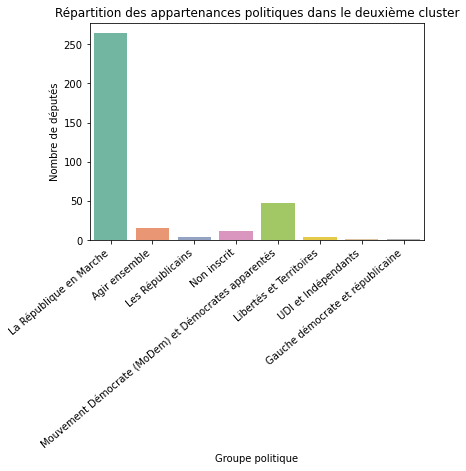

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.countplot(data=list_cluster2[1], x='Groupe politique (complet)', palette='Set2')
plt.title('Répartition des appartenances politiques dans le deuxième cluster')
plt.ylabel('Nombre de députés')
plt.xlabel('Groupe politique')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')

[Text(0, 0, 'Socialistes et apparentés'),
 Text(1, 0, 'Les Républicains'),
 Text(2, 0, 'Non inscrit'),
 Text(3, 0, 'Mouvement Démocrate (MoDem) et Démocrates apparentés'),
 Text(4, 0, 'Libertés et Territoires'),
 Text(5, 0, 'La France insoumise'),
 Text(6, 0, 'UDI et Indépendants'),
 Text(7, 0, 'Gauche démocrate et républicaine'),
 Text(8, 0, 'La République en Marche'),
 Text(9, 0, 'Agir ensemble')]

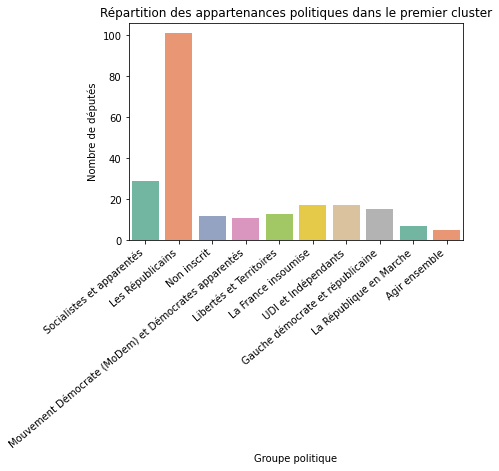

In [123]:
g = sns.countplot(data=list_cluster2[0], x='Groupe politique (complet)', palette='Set2')
plt.title('Répartition des appartenances politiques dans le premier cluster')
plt.ylabel('Nombre de députés')
plt.xlabel('Groupe politique')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')

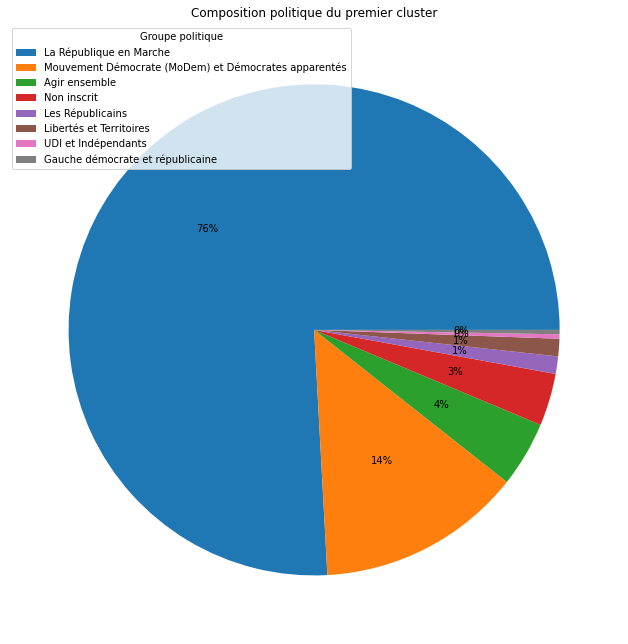

In [124]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_cluster2[1]["Groupe politique (complet)"].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du premier cluster")
labels = list_cluster2[1]['Groupe politique (complet)'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()

<ipython-input-125-02d7459bdc3e>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  g = plt.pie(list_cluster2[0]["Groupe politique (complet)"].value_counts(normalize=True), autopct='%1.0f%%',


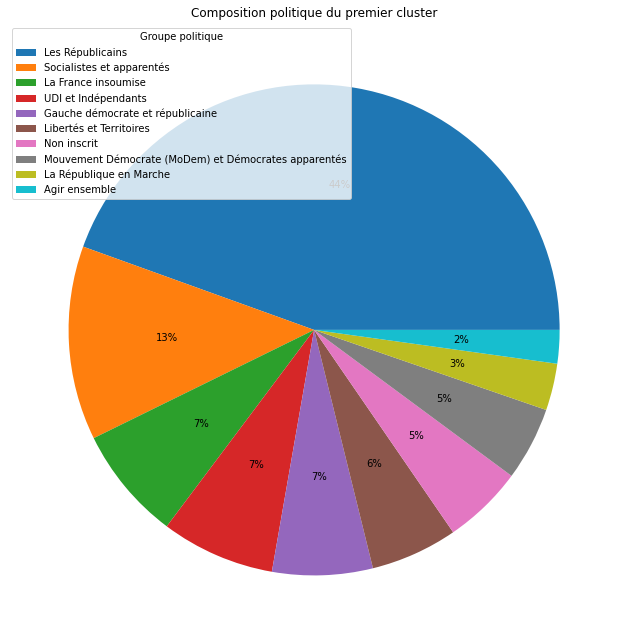

In [125]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_cluster2[0]["Groupe politique (complet)"].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du premier cluster")
labels = list_cluster2[0]['Groupe politique (complet)'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
plt.show()

[Text(0, 0, 'Socialistes et apparentés'),
 Text(1, 0, 'Les Républicains'),
 Text(2, 0, 'Non inscrit'),
 Text(3, 0, 'Mouvement Démocrate (MoDem) et Démocrates apparentés'),
 Text(4, 0, 'Libertés et Territoires'),
 Text(5, 0, 'La France insoumise'),
 Text(6, 0, 'La République en Marche'),
 Text(7, 0, 'UDI et Indépendants'),
 Text(8, 0, 'Gauche démocrate et républicaine'),
 Text(9, 0, 'Agir ensemble')]

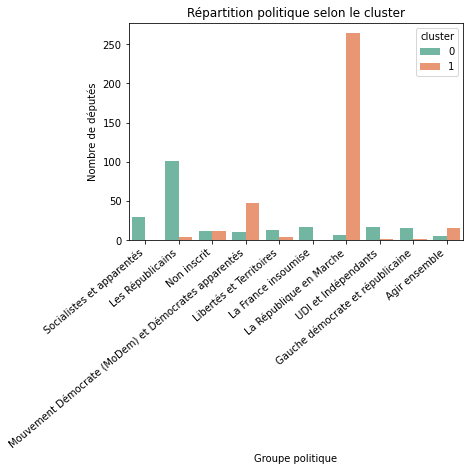

In [126]:
g = sns.countplot(data=df_final2, x='Groupe politique (complet)', palette='Set2', hue='cluster')
plt.title('Répartition politique selon le cluster')
plt.ylabel('Nombre de députés')
plt.xlabel('Groupe politique')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')

**Clustering à 3 clusters**

On affine le premier clustering en en faisant un nouveau à 3 clusters. Cela permet de faire émerger 3 groupes : 1) la majorité 'pure', 2) la majorité et sa coalition de droite, 3) l'opposition. 

In [107]:
df_cluster3 = df_cluster

N_CLUSTERS = 3
clustering = KMeans(n_clusters=N_CLUSTERS)
clustering.fit(df_cluster3)

#on détermine ensuite dans quel cluster chaque individu de df_cluster sera affecté :
pred = clustering.predict(df_cluster3)

df_cluster3['cluster'] = pred #on ajoute une colonne au df, qui indique le numéro du cluster auquel appartient chaque individu

In [108]:
df_clusterised3 = df_cluster3
df_clusterised3

,indice_accord,Contre,Pour,taux_participation,0_Pour_x,1_Pour_x,2_Pour_x,3_Non-votant_x,3_Pour_x,4_Pour_x,...,3111_Pour_y,3112_Pour_y,3113_Non-votant_y,3113_Pour_y,3114_Non-votant_y,3114_Pour_y,3115_Pour_y,3116_Non-votant_y,3116_Pour_y,cluster
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,31.937984,31.162791,68.837209,20.692974,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,2
PA1012,37.425150,34.131737,65.868263,10.715432,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,2
PA1029,43.636364,51.818182,48.181818,3.529034,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
PA1198,32.047478,33.234421,66.765579,10.811678,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,2
PA1206,28.409091,45.454545,54.545455,5.646455,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,40.000000,80.000000,20.000000,0.160411,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
PA856,38.770053,42.780749,57.219251,11.998717,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
PA923,40.259740,41.991342,58.008658,7.410972,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2


In [113]:
df_final3 = df_clusterised3.merge(groupe, left_index=True, right_index=True)
df_final3

,indice_accord,Contre,Pour,taux_participation,0_Pour_x,1_Pour_x,2_Pour_x,3_Non-votant_x,3_Pour_x,4_Pour_x,...,3112_Pour_y,3113_Non-votant_y,3113_Pour_y,3114_Non-votant_y,3114_Pour_y,3115_Pour_y,3116_Non-votant_y,3116_Pour_y,cluster,Groupe politique (complet)
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,31.937984,31.162791,68.837209,20.692974,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,2,Socialistes et apparentés
PA1012,37.425150,34.131737,65.868263,10.715432,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,2,Les Républicains
PA1029,43.636364,51.818182,48.181818,3.529034,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Les Républicains
PA1198,32.047478,33.234421,66.765579,10.811678,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,2,Socialistes et apparentés
PA1206,28.409091,45.454545,54.545455,5.646455,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2,Non inscrit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,40.000000,80.000000,20.000000,0.160411,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Gauche démocrate et républicaine
PA856,38.770053,42.780749,57.219251,11.998717,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2,Les Républicains
PA923,40.259740,41.991342,58.008658,7.410972,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2,Les Républicains


In [110]:
# On crée un dataframe par cluster, afin de regarder la distribution de la variable d'intérêt dans chaque cluster
list_cluster = []
for i in range (N_CLUSTERS):
     list_cluster.append(df_final3[df_final3['cluster'] == i])

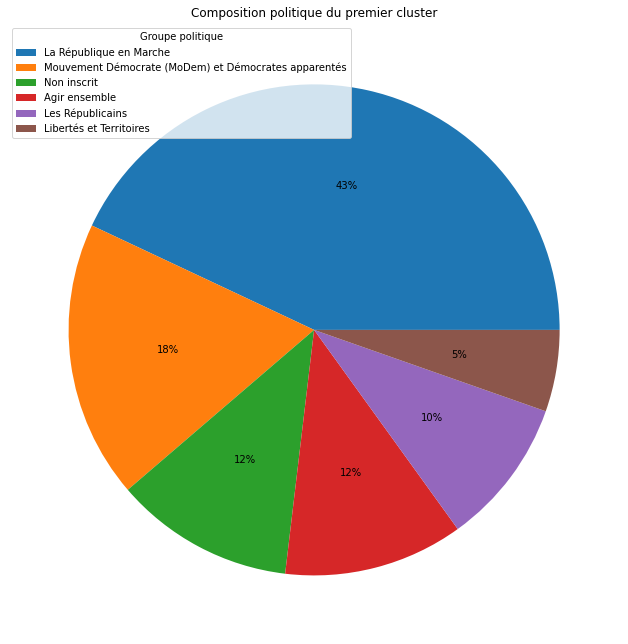

In [111]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_cluster[0]["Groupe politique (complet)"].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du premier cluster")
labels = list_cluster[0]['Groupe politique (complet)'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()

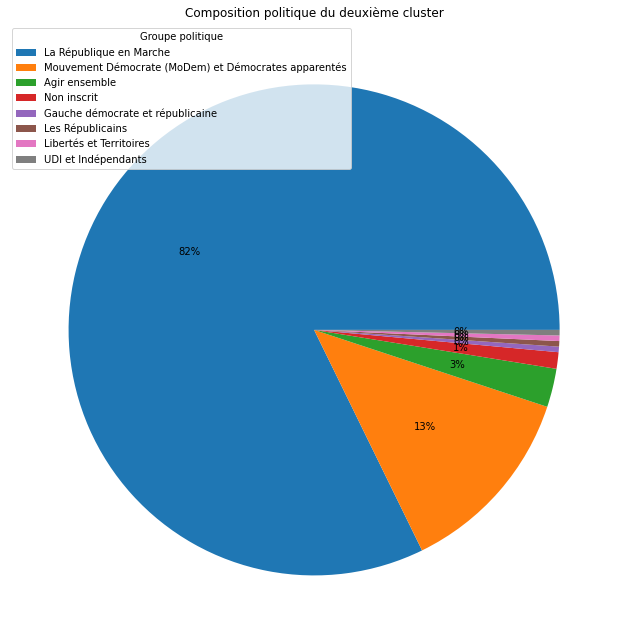

In [114]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_cluster[1]["Groupe politique (complet)"].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du deuxième cluster")
labels = list_cluster[1]['Groupe politique (complet)'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()

<ipython-input-115-46fd2aa5fedf>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  g = plt.pie(list_cluster[2]["Groupe politique (complet)"].value_counts(normalize=True), autopct='%1.0f%%',


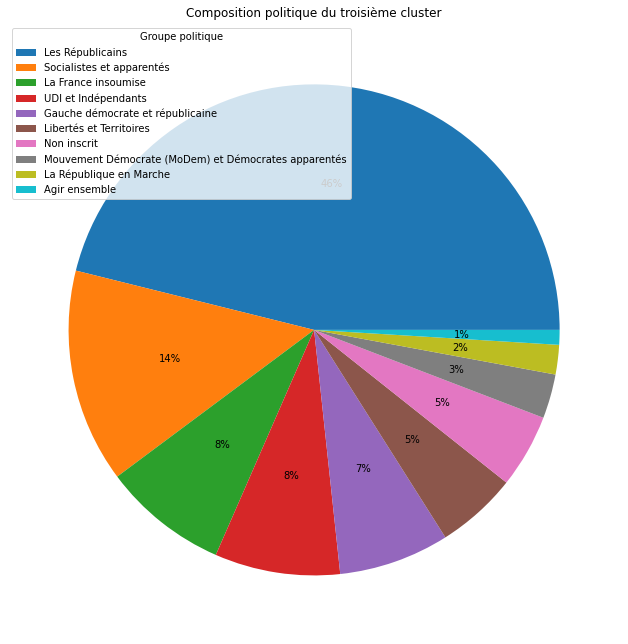

In [115]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_cluster[2]["Groupe politique (complet)"].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du troisième cluster")
labels = list_cluster[2]['Groupe politique (complet)'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()

[Text(0, 0, 'Socialistes et apparentés'),
 Text(1, 0, 'Les Républicains'),
 Text(2, 0, 'Non inscrit'),
 Text(3, 0, 'Mouvement Démocrate (MoDem) et Démocrates apparentés'),
 Text(4, 0, 'Libertés et Territoires'),
 Text(5, 0, 'La France insoumise'),
 Text(6, 0, 'La République en Marche'),
 Text(7, 0, 'UDI et Indépendants'),
 Text(8, 0, 'Gauche démocrate et républicaine'),
 Text(9, 0, 'Agir ensemble')]

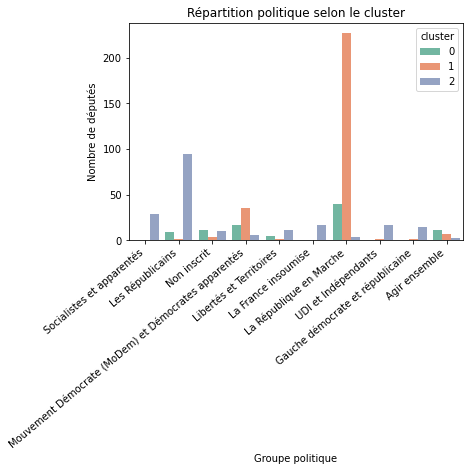

In [127]:
g = sns.countplot(data=df_final3, x='Groupe politique (complet)', palette='Set2', hue='cluster')
plt.title('Répartition politique selon le cluster')
plt.ylabel('Nombre de députés')
plt.xlabel('Groupe politique')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')